In [2]:
"""Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?)"""

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

youtube_base_US = pd.read_csv('USvideos.csv', encoding='utf-8')
youtube_base_US.head()

"""
В ходе исследования базы данных попробуем ответить на следующие вопросы:
1) ТОП-5 самых популярных категорий в США ('category_id') по просмотрам ('views'):
2) карта соотношения лайки/дизлайки в конкретной категории

3) количество просмотров всех роликов ('views') на определнный временной промежуток  
4) как количество комментариев распределяется по ТОП-5 популярных категорий? (дополнительно построить график 
наложением комментариев на лайки) 
"""

youtube_base_US.describe()


,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


Text(0, 0.5, 'views')

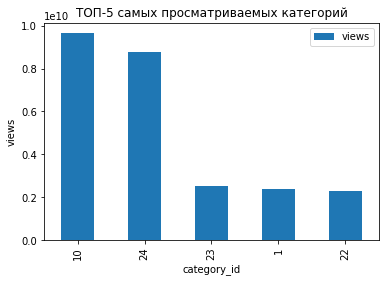

In [6]:
"""Первая задача"""

# Ищем ТОП-5 самых популярных категорий в США ('category_id') по просмотрам ('views'):
# группируем по категориям, считаем в каждой категории количество просмотров (сумма), выводим первую пятерку
# график - столбчатая диаграмма 

# В целях упрощения примем, что данные без выбросов и без пустых строк 
# Анализируем столбцы: 'trending_date', 'category_id', 'views', 'likes', 'dislikes', 'comment_count'

# Отберем нужные столбцы для анализа:

new_table = youtube_base_US[['video_id', 'trending_date', 'category_id', 'views', 'likes', 'dislikes', 'comment_count']] # выборка столбцов 
new_table.describe() # видим, что в столбце video_id 40.949 значений, проверим, сколько уникальных:
len(new_table['video_id'].unique()) # значительно меньше: 6.351

unique_video_id = new_table.groupby('video_id').head() # сгруппировали по столбцу video_id

# категории в разрезе просмотров
favorite_by_views = unique_video_id[['category_id', 'views']].groupby('category_id').sum().sort_values('views', ascending=False).head(5)

# извлечем из джейсона названия категорий и поместим их в созданный для этого словарь:
new_dict = {}
json_format = pd.read_json('US_category_id.json')
result = json_format.get('items')
for i in result:
    for key, value in i.items():
        if key == 'id':
            a = i.get('id')
        if key == 'snippet':
            b = i['snippet']['title']
        new_dict[a] = b

int_dict = {int(x):y for x, y in new_dict.items()} 
cat_transformation = favorite_by_views.replace({'category_id': int_dict})

cat_transformation.plot(kind='bar', 
                    title='ТОП-5 самых просматриваемых категорий')
                   
plt.xlabel('category_id')
plt.ylabel('views')




Text(0, 0.5, 'dislikes')

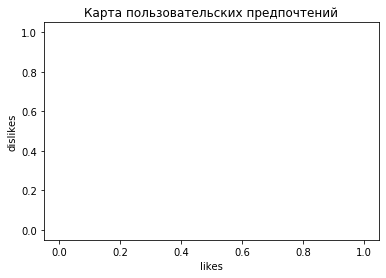

In [7]:
"""Вторая задача"""

# Вычислим соотношение лайков к дизлайкам и занесем эти данные в столбец rating
# Сгруппируем по столбцу category_id и выберем 10 самых популярных категорий
# Построим диаграмму





youtube_base_cat_24 = youtube_base_US[youtube_base_US['category_id'].isin(['24'])]
youtube_base_cat_24.plot(kind='scatter', 
        x='likes', 
        y='dislikes', 
        c= 'green',
        colormap='viridis',
        title='Карта пользовательских предпочтений')

plt.xlabel('likes')
plt.ylabel('dislikes')


Text(0, 0.5, 'Просмотры')

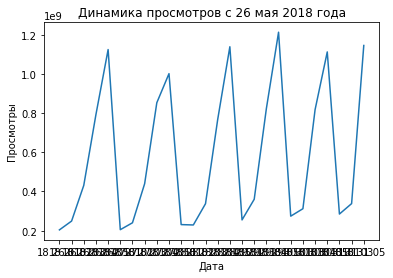

In [75]:
"""Третья задача"""

# Изучаем просмотры за выбранный промежуток времени

filter_large_date = youtube_base_US['trending_date'] > '18.25.05'
youtube_base_US_date = (youtube_base_US[['trending_date', 'views']]
                        .loc[filter_large_date]
    .groupby('trending_date').sum())
                        

plt.plot(youtube_base_US_date.index, youtube_base_US_date.views)
plt.title('Динамика просмотров с 26 мая 2018 года')
plt.xlabel('Дата')
plt.ylabel('Просмотры')

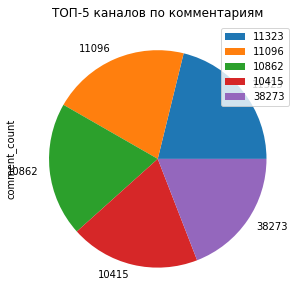

In [76]:
"""Четвертая задача
Как количество комментариев распределяется по ТОП-5 популярных youtube-каналов с количеством просмотров больше 50 тысяч
и суммой лайков больше 10.000? 
"""

# Как подписать каналы вместо просмотров? 

filter_large_views = youtube_base_US['views'] > 50000
filter_large_likes = youtube_base_US['likes'] > 10000
comments_by_comment_count = (youtube_base_US[['category_id', 'channel_title', 'views', 'comment_count', 'likes']]
                         .loc[filter_large_views & filter_large_likes]
                         .sort_values('comment_count', ascending=False)
                         .head()
                         )


plot = comments_by_comment_count.plot.pie(y='comment_count', figsize=(5, 5), title='ТОП-5 каналов по комментариям')
